# Dataset de reserva de hotel

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\HP\anaconda3\codigos\Machine-Learning2\hotel_bookings.csv", encoding='iso-8859-1')

**Cantidad de filas y columnas**

In [5]:
df.shape

(119390, 32)

**Columnas iniciales**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Proporción de valores nulos**

In [9]:
df.isnull().sum() / len(df) * 100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

| Columna  | % Nulos | Acción                                   |
|----------|---------|------------------------------------------|
| children | 0.33%   | Completar campos con la mediana.                 |
| country  | 40.87%  | Completar campos con 'Unknown'.                  |
| agent    | 13.69%  | Completar campos cifra cero 0. |
| company  | 94.31%  | Eliminar la columna.                    |


In [11]:
if 'company' in df.columns:
    df.drop(columns=['company'], inplace=True)
df['children'] = df['children'].fillna(df['children'].median())
df['country'] = df['country'].fillna('Unknown')
df.fillna(0, inplace = True)


In [12]:
df.isnull().sum() / len(df) * 100

hotel                             0.0
is_canceled                       0.0
lead_time                         0.0
arrival_date_year                 0.0
arrival_date_month                0.0
arrival_date_week_number          0.0
arrival_date_day_of_month         0.0
stays_in_weekend_nights           0.0
stays_in_week_nights              0.0
adults                            0.0
children                          0.0
babies                            0.0
meal                              0.0
country                           0.0
market_segment                    0.0
distribution_channel              0.0
is_repeated_guest                 0.0
previous_cancellations            0.0
previous_bookings_not_canceled    0.0
reserved_room_type                0.0
assigned_room_type                0.0
booking_changes                   0.0
deposit_type                      0.0
agent                             0.0
days_in_waiting_list              0.0
customer_type                     0.0
adr         

**Datos Errados**

En este data set estan registradas la cantidad de adultos, niños y bebés que se hospedan en el hotel, se eliminan los registros en donde no hay adultos registrados

In [14]:
filter =(df.adults == 0)
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117204,City Hotel,0,296,2017,July,30,27,1,3,0,...,0,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-07-31
117274,City Hotel,0,276,2017,July,31,30,2,1,0,...,1,No Deposit,9.0,0,Transient,93.64,0,2,Check-Out,2017-08-02
117303,City Hotel,0,291,2017,July,30,29,2,2,0,...,0,No Deposit,9.0,0,Transient,98.85,0,1,Check-Out,2017-08-02
117453,City Hotel,0,159,2017,July,31,31,1,3,0,...,1,No Deposit,9.0,0,Transient,121.88,0,1,Check-Out,2017-08-04


In [15]:
df.drop(df[df['adults'] == 0].index, inplace=True)

# Análisis Exploratorio de Datos

En este dataset están los registros de dos hoteles, también si es que fueron cancelados

In [78]:
df.groupby('hotel')['is_canceled'].value_counts()

hotel         is_canceled
City Hotel    0              45945
              1              32995
Resort Hotel  0              28927
              1              11120
Name: count, dtype: int64

Las reservas de ambos hoteles se concentran en Europa, la particularidad para el City Hotel es que tiene una cantidad donsiderable de reservas desde Brasil, de igual foma con el Resort Hotel, tiene cantidad considerable de reservas desde China

In [44]:
df[df['is_canceled'] == 0].groupby('hotel')['country'].value_counts().groupby('hotel').head(10).reset_index()

,hotel,country,count
0,City Hotel,PRT,10762
1,City Hotel,FRA,7049
2,City Hotel,DEU,4999
3,City Hotel,GBR,3734
4,City Hotel,ESP,3268
5,City Hotel,ITA,2045
6,City Hotel,BEL,1466
7,City Hotel,NLD,1254
8,City Hotel,USA,1181
9,City Hotel,BRA,1059


| Hotel         | Country | Pais    | Cantidad |
|---------------|---------|-----------------|-------|
| City Hotel    | PRT     | Portugal        | 10762 |
|     | FRA     | France          | 7049  |
|     | DEU     | Germany         | 4999  |
|     | GBR     | United Kingdom  | 3734  |
|     | ESP     | Spain           | 3268  |
|     | ITA     | Italy           | 2045  |
|     | BEL     | Belgium         | 1466  |
|     | NLD     | Netherlands     | 1254  |
|     | USA     | United States   | 1181  |
|     | BRA     | Brazil          | 1059  |
| Resort Hotel  | PRT     | Portugal        | 10184 |
|   | GBR     | United Kingdom  | 5922  |
|   | ESP     | Spain           | 3105  |
|   | IRL     | Ireland         | 1734  |
|   | FRA     | France          | 1399  |
|   | DEU     | Germany         | 1057  |
|   | CN      | China           | 614   |
|   | NLD     | Netherlands     | 458   |
|   | Unknown | Unknown Country | 419   |
|   | USA     | United States   | 407   |



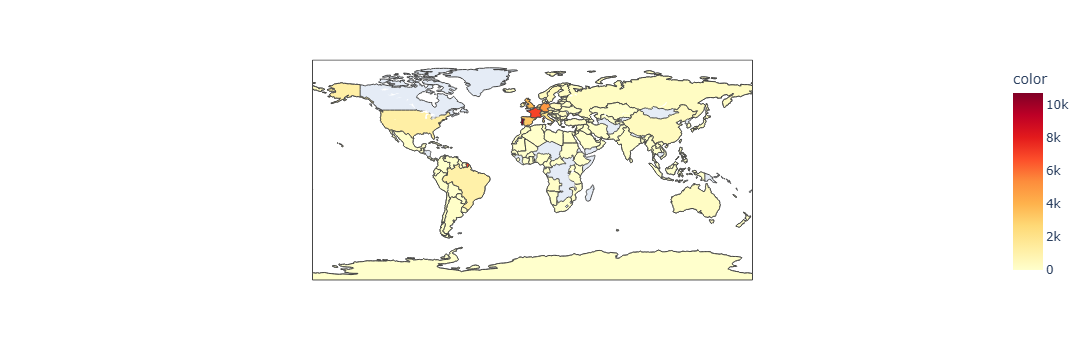

In [91]:
import folium
from folium.plugins import HeatMap
import plotly.express as px
country_map_ch = df[(df['is_canceled'] == 0) & (df['hotel'] == 'City Hotel')]['country'].value_counts().reset_index()
country_map_ch.columns = ['country', 'number']
basemap = folium.Map()
guests_map_ch = px.choropleth(country_map, 
                           locations = country_map_ch['country'],
                           color = country_map_ch['number'], 
                           hover_name = country_map_ch['country'],
                           color_continuous_scale='YlOrRd')
guests_map_ch.show()


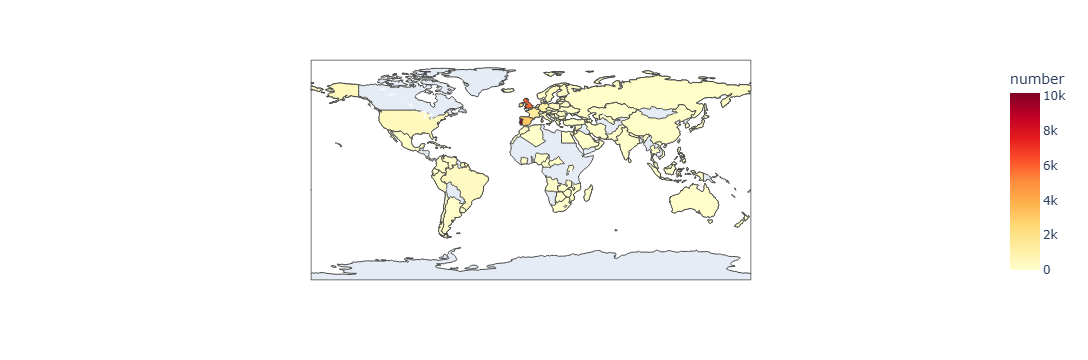

In [89]:
import folium
from folium.plugins import HeatMap
import plotly.express as px
country_map_rh = df[(df['is_canceled'] == 0) & (df['hotel'] == 'Resort Hotel')]['country'].value_counts().reset_index()
country_map_rh.columns = ['country', 'number']
basemap = folium.Map()
guests_map_rh = px.choropleth(country_map_rh, 
                           locations = country_map_rh['country'],
                           color = country_map_rh['number'], 
                           hover_name = country_map_rh['country'],
                           color_continuous_scale='YlOrRd')
guests_map_rh.show()


In [97]:
df['market_segment'].value_counts()

market_segment
Online TA        56221
Offline TA/TO    24179
Groups           19791
Direct           12553
Corporate         5282
Complementary      724
Aviation           235
Undefined            2
Name: count, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118987 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118987 non-null  object 
 1   is_canceled                     118987 non-null  int64  
 2   lead_time                       118987 non-null  int64  
 3   arrival_date_year               118987 non-null  int64  
 4   arrival_date_month              118987 non-null  object 
 5   arrival_date_week_number        118987 non-null  int64  
 6   arrival_date_day_of_month       118987 non-null  int64  
 7   stays_in_weekend_nights         118987 non-null  int64  
 8   stays_in_week_nights            118987 non-null  int64  
 9   adults                          118987 non-null  int64  
 10  children                        118987 non-null  float64
 11  babies                          118987 non-null  int64  
 12  meal                 